## Parameter tuning and model selection

In [1]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [2]:
## get data from sklearn
from sklearn.datasets import load_breast_cancer
cancer= load_breast_cancer()

In [5]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [6]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [7]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [8]:
X=cancer.data
y= cancer.target

In [9]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [11]:
X[:5]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

## train and test on the entire dataset

In [13]:
model.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [14]:
model.score(X,y)

0.9472759226713533

In [15]:
model1 = KNeighborsClassifier(1)
model1.fit(X,y)
model1.score(X,y)

1.0

## train test split

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)
model2 = KNeighborsClassifier()
model2.fit(X_train,y_train)
print("training accuracy: ",model2.score(X_train,y_train))
print("testing accuracy: ",model2.score(X_test,y_test))

training accuracy:  0.9413145539906104
testing accuracy:  0.9300699300699301


In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y)
model2 = KNeighborsClassifier(10)
model2.fit(X_train,y_train)
print("training accuracy: ",model2.score(X_train,y_train))
print("testing accuracy: ",model2.score(X_test,y_test))

training accuracy:  0.9413145539906104
testing accuracy:  0.9440559440559441


In [18]:
model2 = KNeighborsClassifier(12)
model2.fit(X_train,y_train)
print("training accuracy: ",model2.score(X_train,y_train))
print("testing accuracy: ",model2.score(X_test,y_test))

training accuracy:  0.9366197183098591
testing accuracy:  0.9370629370629371


In [20]:
for i in range(1,31):
    model2 = KNeighborsClassifier(i)
    model2.fit(X_train,y_train)
    print(f"K:{i}")
    print("training accuracy: ",model2.score(X_train,y_train))
    print("testing accuracy: ",model2.score(X_test,y_test))
    print()


K:1
training accuracy:  1.0
testing accuracy:  0.9090909090909091

K:2
training accuracy:  0.9694835680751174
testing accuracy:  0.9300699300699301

K:3
training accuracy:  0.960093896713615
testing accuracy:  0.9230769230769231

K:4
training accuracy:  0.9483568075117371
testing accuracy:  0.9300699300699301

K:5
training accuracy:  0.9507042253521126
testing accuracy:  0.9370629370629371

K:6
training accuracy:  0.9366197183098591
testing accuracy:  0.9440559440559441

K:7
training accuracy:  0.9460093896713615
testing accuracy:  0.9370629370629371

K:8
training accuracy:  0.9413145539906104
testing accuracy:  0.9440559440559441

K:9
training accuracy:  0.9436619718309859
testing accuracy:  0.9370629370629371

K:10
training accuracy:  0.9413145539906104
testing accuracy:  0.9440559440559441

K:11
training accuracy:  0.9342723004694836
testing accuracy:  0.9370629370629371

K:12
training accuracy:  0.9366197183098591
testing accuracy:  0.9370629370629371

K:13
training accuracy:  0.93

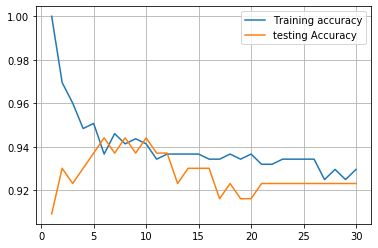

In [27]:
import matplotlib.pyplot as plt
kRange=range(1,31)
training_scores=[]
testing_scores=[]
for i in kRange:
    model2 = KNeighborsClassifier(i)
    model2.fit(X_train,y_train)
    training_scores.append(model2.score(X_train,y_train))
    testing_scores.append(model2.score(X_test,y_test))
#     print()
plt.plot(kRange,training_scores,label="Training accuracy")
plt.plot(kRange,testing_scores,label="Testing Accuracy")
plt.legend()
plt.grid()

In [ ]:
actual_model=KNeighborsClassifier(6)
actual_model.fit(X_train,y_train)
